In [44]:
from avl import *
from bst import *
from rbt import *
import csv
import matplotlib.pyplot as plt
import random
import statistics as st
import time as t

In [45]:
# Create an array with exponential sizes
# in range(FIRST_SIZE,LAST_SIZE)
def sizeGenerator(first_size, last_size, span):
    sizes = []
    a = first_size
    b = (last_size/first_size)**(float(1/(span-1)))
    for i in range(span):
        sizes.append(int(a*(b**i)))
    return sizes

In [46]:
# Generate a keys list, of lenght n
def generateKeys(n):
    a = []
    for i in range(n):
        a.append(random.randint(0, MAX_KEY))
    return a

# Generate list of lists to be used with runAVL/BST/RBTsmart()
def generateInput(dim):
    a = []
    for i in dim:
        a.append(generateKeys(i))
    return a

In [47]:
# Set chosen parameters
FIRST_SIZE = 1_000
LAST_SIZE = 100_00
RANGE = 100
MAX_KEY = 2147483647

# Generate input array
dim = sizeGenerator(FIRST_SIZE,LAST_SIZE,RANGE)

<p>run___random è un metodo suggerito da prof</p>

In [48]:
def runBSTrandom(n): # int n -> size of the tree
    node = Node(random.randint(0, MAX_KEY), "")
    for i in range(0, n):
        key = random.randint(0, MAX_KEY)
        if bst_find(node, key) == None:
            bst_insert(node, key, "")

def runAVLrandom(n): # int n -> size of the tree
    node = AVLNode(random.randint(0, MAX_KEY), "")
    for i in range(0, n):
        key = random.randint(0, MAX_KEY)
        if avl_find(node, key) == None:
            avl_insert(node, key, "")

def runRBTrandom(n): # int n -> size of the tree
    node = RedBlackTree()
    node.rbt_insert(random.randint(0, MAX_KEY), "")
    for i in range(0, n):
        key = random.randint(0, MAX_KEY)
        if rbt_find(node.root, key) == None:
            node.rbt_insert(key, "")

<p>run___sorted serve per misurare il caso pessimo di bst<p>

In [49]:
def runBSTsorted(n): # int n -> size of the tree
    node = Node(0, "")
    for i in range(1, n):
        key = i
        #if bst_find(node, key) is None: possiamo omettere il controllo, altrimenti dobbiamo usare la versione iterativa
        bst_insert_iterative(node, key, "")

def runAVLsorted(n): # int n -> size of the tree
    node = AVLNode(0, "")
    for i in range(1, n):
        key = i
        #if avl_find(node, key) == None:
        avl_insert(node, key, "")

def runRBTsorted(n): # int n -> size of the tree
    node = RedBlackTree()
    node.rbt_insert(0, "")
    for i in range(1, n):
        key = i
        #if rbt_find(node.root, key) == None:
        node.rbt_insert(key, "")

<p>run___smart serve in caso si vogliono confrontare gli algoritmi dato lo stesso input</p>

In [50]:
def runBSTsmart(n): # n -> list of keys to generate bst
    node = Node(random.randint(0, MAX_KEY), "")
    for i in n:
        key = i
        if bst_find(node, key) == None:
            bst_insert(node, key, "")

def runAVLsmart(n): # n -> list of keys to generate avl tree
    node = AVLNode(random.randint(0, MAX_KEY), "")
    for i in n:
        key = i
        if avl_find(node, key) == None:
            avl_insert(node, key, "")

def runRBTsmart(n): # n -> list of keys to generate rbt
    node = RedBlackTree()
    node.rbt_insert(random.randint(0, MAX_KEY), "")
    for i in n:
        key = i
        if rbt_find(node.root, key) == None:
            node.rbt_insert(key, "")

In [51]:
# System time resolution

TIME_ERROR = 0.001

start = t.time()
end = t.time()

while (start == end):
    end = t.time()

r = end - start
t_min = r*((1/TIME_ERROR)+1)

<h2> Misurazione di tempi ammortizati con alberi random </h2>

In [52]:
# Create an array with averege amortized timings for BST
amortizedTimes_BST = []
for n in dim:
    i = 0
    t_passed = 0
    while ( t_passed <= t_min ):
        start = t.time()
        runBSTrandom(n)
        end = t.time()
        i += 1
        t_passed += end-start
    amortizedTimes_BST.append((t_passed/i)/n) 

In [53]:
# Create an array with averege amortized timings for AVL
amortizedTimes_AVL = []
for n in dim:
    i = 0
    t_passed = 0
    while ( t_passed <= t_min ):
        start = t.time()
        runAVLrandom(n)
        end = t.time()
        i += 1
        t_passed += end-start
    amortizedTimes_AVL.append((t_passed/i)/n)

In [54]:
# Create an array with averege amortized timings for RBT
amortizedTimes_RBT = []
for n in dim:
    i = 0
    t_passed = 0
    while ( t_passed <= t_min ):
        start = t.time()
        runRBTrandom(n)
        end = t.time()
        i += 1
        t_passed += end-start
    amortizedTimes_RBT.append((t_passed/i)/n)

<h2>Misurazione di tempi ammortizati con input ordinati (caso pessimo BST)</h2>
<p>PS: non usare LAST_SIZE molto grande perché BST ci mette una vita</p>

In [55]:
# Create an array with averege amortized timings for RBT
amortizedTimes_BST_sorted = []
for n in dim:
    i = 0
    t_passed = 0
    while ( t_passed <= t_min ):
        start = t.time()
        runBSTsorted(n)
        end = t.time()
        i += 1
        t_passed += end-start
    amortizedTimes_BST_sorted.append((t_passed/i)/n)

In [56]:
# Create an array with averege amortized timings for RBT
amortizedTimes_AVL_sorted = []
for n in dim:
    i = 0
    t_passed = 0
    while ( t_passed <= t_min ):
        start = t.time()
        runAVLsorted(n)
        end = t.time()
        i += 1
        t_passed += end-start
    amortizedTimes_AVL_sorted.append((t_passed/i)/n)

In [57]:
# Create an array with averege amortized timings for RBT
amortizedTimes_RBT_sorted = []
for n in dim:
    i = 0
    t_passed = 0
    while ( t_passed <= t_min ):
        start = t.time()
        runRBTsorted(n)
        end = t.time()
        i += 1
        t_passed += end-start
    amortizedTimes_RBT_sorted.append((t_passed/i)/n)

<h2>Misurazinoe di tempi ammortizati con gli stessi input generati per tutti alberi</h2>
<p>forse si può vedere qualcosa di interessante o forse no</p>

In [58]:
new_generated_input = generateInput(dim)

In [59]:
amortizedTimes_BST_smart = []
for n in new_generated_input:
    i = 0
    t_passed = 0
    while ( t_passed <= t_min ):
        start = t.time()
        runBSTsmart(n)
        end = t.time()
        i += 1
        t_passed += end-start
    amortizedTimes_BST_smart.append((t_passed/i)/len(n))

In [60]:
amortizedTimes_AVL_smart = []
for n in new_generated_input:
    i = 0
    t_passed = 0
    while ( t_passed <= t_min ):
        start = t.time()
        runAVLsmart(n)
        end = t.time()
        i += 1
        t_passed += end-start
    amortizedTimes_AVL_smart.append((t_passed/i)/len(n))

In [62]:
# Create an array with averege amortized timings for BST
amortizedTimes_RBT_smart = []
for n in new_generated_input:
    i = 0
    t_passed = 0
    while ( t_passed <= t_min ):
        start = t.time()
        runRBTsmart(n)
        end = t.time()
        i += 1
        t_passed += end-start
    amortizedTimes_RBT_smart.append((t_passed/i)/len(n))

In [63]:
row_list = [['id', 'size', 'amortizedTimes_BST', 'amortizedTimes_AVL', 'amortizedTimes_RBT']]
for i in range(RANGE):
    row_list.append([i, dim[i], amortizedTimes_BST[i], amortizedTimes_AVL[i], amortizedTimes_RBT[i]])

with open('resultsNew.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(row_list)

In [64]:
row_list = [['id', 'size', 'amortizedTimes_BST', 'deviazioneStandard_BST' 'amortizedTimes_AVL', 'deviazioneStandard_AVL', 'amortizedTimes_RBT', 'deviazioneStandard_AVL']]
for i in range(RANGE):
    row_list.append([
        i, dim[i], amortizedTimes_BST[i], st.stdev(amortizedTimes_BST),
        amortizedTimes_AVL[i], st.stdev(amortizedTimes_AVL), 
        amortizedTimes_RBT[i], st.stdev(amortizedTimes_RBT)
     ])

with open('resultsresult.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(row_list)

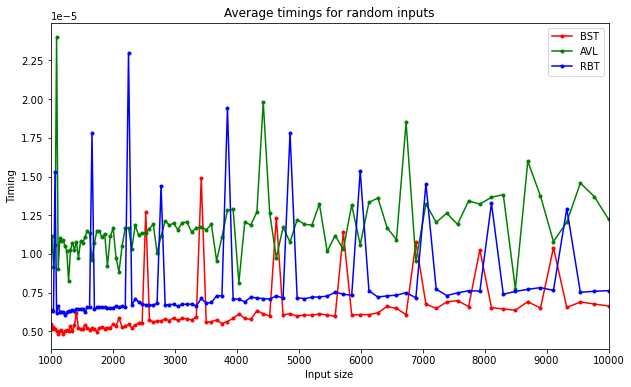

In [65]:
#grafico con tempi medi ammortizati 
sizes = []
a = FIRST_SIZE
b = (LAST_SIZE/FIRST_SIZE)**(float(1/(RANGE-1)))
for i in range(RANGE):
    sizes.append(int(a*(b**i)))

plt.figure(figsize=(10, 6))
plt.plot(dim, amortizedTimes_BST, 'r', linestyle='-', marker='.', label = "BST")
plt.plot(dim, amortizedTimes_AVL, 'g', linestyle='-', marker='.', label = "AVL")
plt.plot(dim, amortizedTimes_RBT, 'b', linestyle='-', marker='.', label = "RBT")
plt.title('Average timings for random inputs')
plt.xlabel('Input size')
plt.xscale('linear') # 'linear'|'log'
plt.xlim(FIRST_SIZE,LAST_SIZE) 
plt.ylabel('Timing') 
plt.yscale('linear') # 'linear'|'log'
plt.legend()
plt.show()

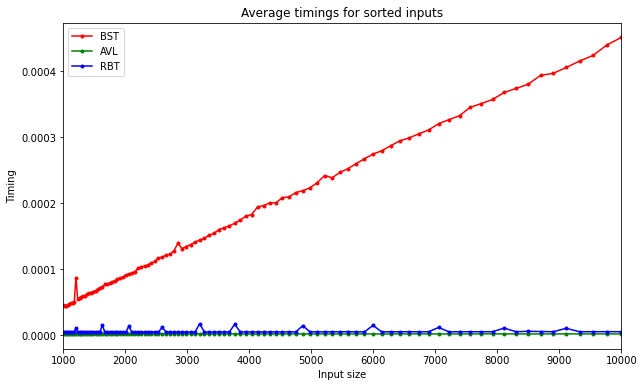

In [66]:
#Grafico con tempi medi ammortizatti caso pessimo bst
sizes = []
a = FIRST_SIZE
b = (LAST_SIZE/FIRST_SIZE)**(float(1/(RANGE-1)))
for i in range(RANGE):
    sizes.append(int(a*(b**i)))

plt.figure(figsize=(10, 6))
plt.plot(sizes, amortizedTimes_BST_sorted, 'r', linestyle='-', marker='.', label = "BST")
plt.plot(sizes, amortizedTimes_AVL_sorted, 'g', linestyle='-', marker='.', label = "AVL")
plt.plot(sizes, amortizedTimes_RBT_sorted, 'b', linestyle='-', marker='.', label = "RBT")
plt.title('Average timings for sorted inputs')
plt.xlabel('Input size')
plt.xscale('linear') # 'linear'|'log'
plt.xlim(FIRST_SIZE,LAST_SIZE) 
plt.ylabel('Timing') 
plt.yscale('linear') # 'linear'|'log'
plt.legend()
plt.show()

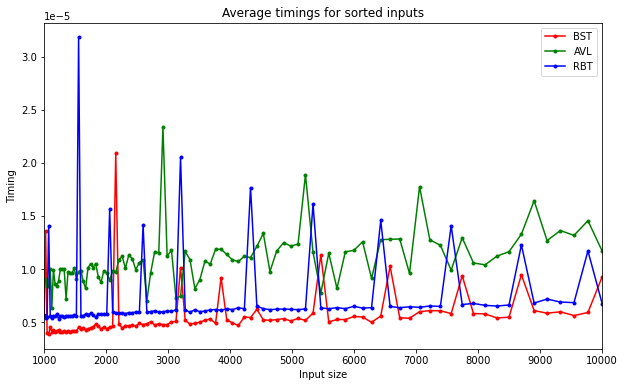

In [67]:
#Grafico con tempi medi ammortizatti con gli stessi input
sizes = []
a = FIRST_SIZE
b = (LAST_SIZE/FIRST_SIZE)**(float(1/(RANGE-1)))
for i in range(RANGE):
    sizes.append(int(a*(b**i)))

plt.figure(figsize=(10, 6))
plt.plot(sizes, amortizedTimes_BST_smart, 'r', linestyle='-', marker='.', label = "BST")
plt.plot(sizes, amortizedTimes_AVL_smart, 'g', linestyle='-', marker='.', label = "AVL")
plt.plot(sizes, amortizedTimes_RBT_smart, 'b', linestyle='-', marker='.', label = "RBT")
plt.title('Average timings for sorted inputs')
plt.xlabel('Input size')
plt.xscale('linear') # 'linear'|'log'
plt.xlim(FIRST_SIZE,LAST_SIZE) 
plt.ylabel('Timing') 
plt.yscale('linear') # 'linear'|'log'
plt.legend()
plt.show()